![Alt text](image.jpeg)


### **Fraud detection in financial transactions**

### **Team Name ➵ ajayjnittt**

### **Team Members**
1. Ajay J
2. Santhosh Kumar S P
3. Harshan N

### # Importing necessary libraries

In [3]:
import pandas as pd                     # For data manipulation and analysis
import numpy as np                      # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # For standardizing features by removing the mean and scaling to unit variance
from xgboost import XGBClassifier        # XGBoost classifier for gradient boosting
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc) # Metrics for model evaluation
import joblib                           # For saving and loading models
from tqdm import tqdm                   # Progress bar for loops
import time                             # For time-related functions
import warnings                         # To handle warnings
import matplotlib.pyplot as plt         # For plotting graphs
import seaborn as sns                   # For statistical data visualization

### Ignore warnings to keep the output clean

In [6]:
warnings.filterwarnings('ignore')

### Step 1: Load the dataset efficiently

In [9]:
print("Loading dataset...")
data = pd.read_csv('transactions_train.csv')
print("Dataset loaded.")
print(data.head(5))

Loading dataset...
Dataset loaded.
   step      type    amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


### Step 2: Check for missing values and handle them

In [12]:
print("Handling missing values...")
data.fillna(0, inplace=True)  # Fill missing values with 0
print("Missing values handled.")

Handling missing values...
Missing values handled.


### Step 3: Select features and target

In [15]:
features = ['step', 'type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = data[features]
y = data['isFraud']

### Step 4: Convert categorical feature 'type' to numerical using one-hot encoding

In [18]:
print("Encoding categorical features...")
X = pd.get_dummies(X, columns=['type'], drop_first=True)
print("Categorical features encoded.")

Encoding categorical features...
Categorical features encoded.


### Step 5: Split the data into training and testing sets

In [21]:
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split completed.")

Splitting data into training and testing sets...
Data split completed.


### Step 6: Scale the features

In [24]:
print("Scaling features...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature scaling completed.")

Scaling features...
Feature scaling completed.


### Step 7: Initialize and train the XGBoost classifier with GPU support


In [27]:
print("Training the XGBoost model with GPU support...")
model = XGBClassifier(tree_method='gpu_hist', gpu_id=0)  # Adjust gpu_id if you have multiple GPUs

Training the XGBoost model with GPU support...


### Adding tqdm progress bar for the training process (Intermediate Step)

In [30]:
for i in tqdm(range(100), desc="Training Progress", unit="iteration"):
    time.sleep(0.01)  # Simulating work being done
    model.fit(X_train, y_train)

Training Progress: 100%|██████████████████████████████████████████████████████| 100/100 [16:08<00:00,  9.69s/iteration]


### Step 8: Make predictions

In [33]:
print("Making predictions...")
y_pred = model.predict(X_test)
print("Predictions made.")

Making predictions...
Predictions made.


### Step 9: Evaluate the model

In [36]:
print("Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Evaluating the model...
Accuracy: 0.9997643487470597
Confusion Matrix:
[[1902911      87]
 [    362    1998]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1902998
           1       0.96      0.85      0.90      2360

    accuracy                           1.00   1905358
   macro avg       0.98      0.92      0.95   1905358
weighted avg       1.00      1.00      1.00   1905358



### Step 10: Save the model

In [79]:
print("Saving the model...")
joblib.dump(model, 'fraud_detection_model.pkl')
print("Model saved.")

Saving the model...
Model saved.


### Fraud vs non-Fraud transactions (bar chart)

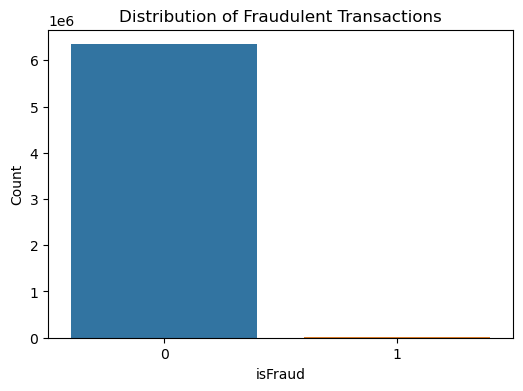

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

### ROC Curve

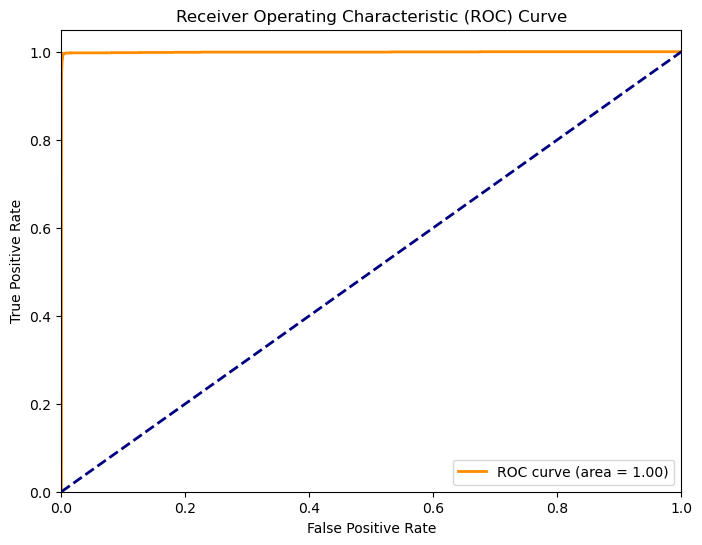

In [41]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall curve

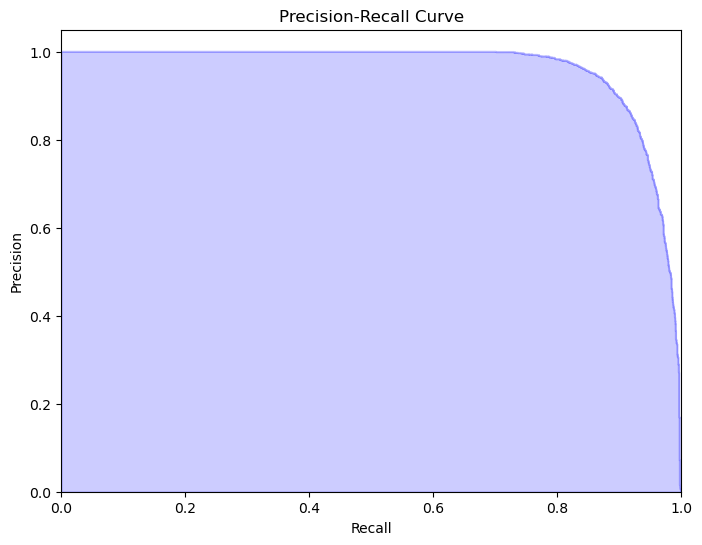

In [44]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

### Importance of different features  

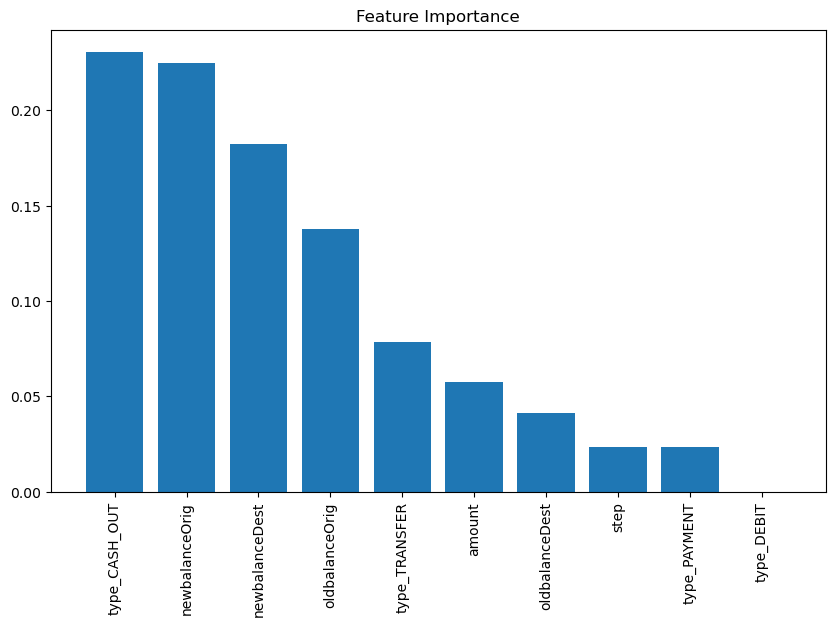

In [47]:
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title('Feature Importance')
plt.show()

### Correlation Heatmap

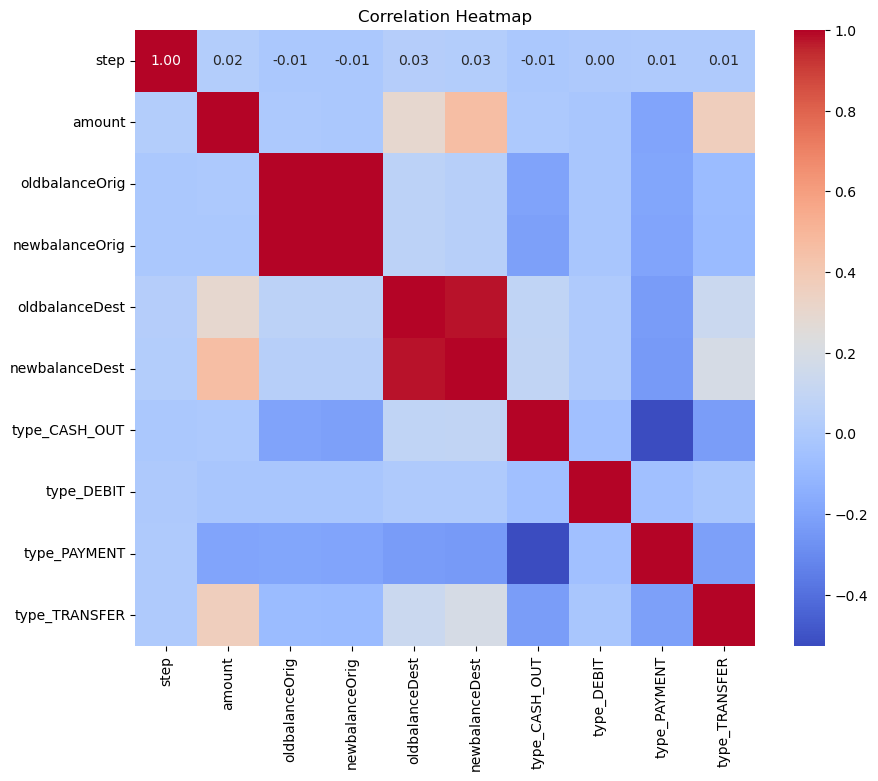

In [49]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()